In [1]:
# Compute value at risk (VaR) of a portfolio of stocks
# VaR estimates how much your portfolio might lose over a set time period

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy.stats import norm
import yfinance as yf

In [4]:
# Create portfolio of stocks
tickers = ["AAPL","META", "C","DIS"]

In [5]:
# pick weights of each stock
weights = np.array([0.25,0.3,0.15,0.3])

In [16]:
# the size of the p[ortfolio
portfolio_value = 1_000

In [17]:
# the confidence interval (95% confidence)
confidence = 0.05

In [18]:
# Get data from yf
data = yf.download(tickers,start='2018-01-01',end='2022-12-31')["Close"]

[*********************100%***********************]  4 of 4 completed


In [22]:
# Compute portfolio statistics

# Get daily returns of stocks in portfolio
returns = data.pct_change()

# Get the mean returns for all data for AAPL, C, DIS, META
mean_returns = returns.mean()

#  Apply weights of each stock to mean_returns
portfolio_mean = mean_returns.dot(weights)

# Multiply by portfolio value to get the investment mean return
investment_mean = (1 + portfolio_mean) * portfolio_value

# Compute the  covariance between returns
cov_matrix = returns.cov()

# Take square root of covariance adjusted wweights of stock portfolio
portfolio_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# compute portfolio standard deviation
investment_stdev = portfolio_value * portfolio_stdev

In [25]:
# ppf takes a percentage and returns a standard deviation multiplier for what that percentage occurs at
# it is equivalent to a one-tail test on the density plot

percent_point = norm.ppf(confidence, investment_mean, investment_stdev)
percent_point

969.313241397873

In [26]:
# VaR is the portfolio less this amount
value_at_risk = portfolio_value - percent_point

In [28]:
print(f'Portfolio VaR: {value_at_risk}')

Portfolio VaR: 30.686758602127043


In [29]:
# Stock returns increase with the squarte root of time
import matplotlib.pyplot as plt

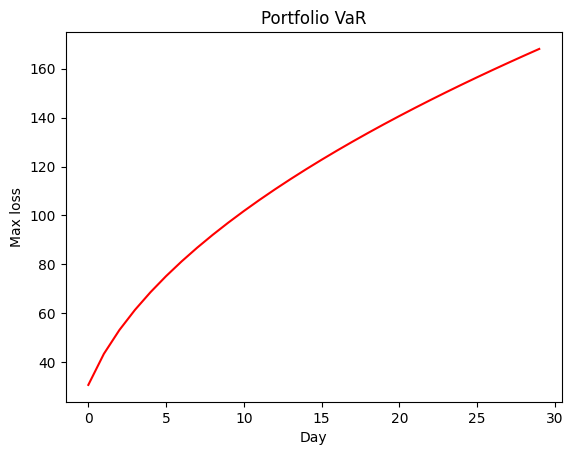

In [30]:
value_at_risks = value_at_risk * np.sqrt(range(1,31))

plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")